In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils

from tqdm import tqdm
import random

c:\Users\hamar\USU\CS-5060\CourseProject\utils.py:3: DtypeWarning: Columns (10,41,45,247) have mixed types. Specify dtype option on import or set low_memory=False.
  COLLEGES: list[str] = (data := pd.read_csv(f"data/filtered-data.csv")).groupby("INSTNM").agg("mean", numeric_only=True).reset_index()[["INSTNM", "COSTT4_A","SAT_AVG"]].copy().dropna(axis="rows").sample(100, random_state=0)["INSTNM"].unique()


In [2]:
data = pd.read_csv("data/filtered-data.csv", low_memory=False)

In [3]:
def find_peak(array):
    index = 0
    max = 0

    for i in range(len(array)):
        if array[i] > max:
            max = array[i]
            index = i

    return index, max

In [4]:
def get_response(probability):
    if random.random() < probability:
        return True
    else:
        return False

100%|██████████| 1000/1000 [1:11:11<00:00,  4.27s/it]


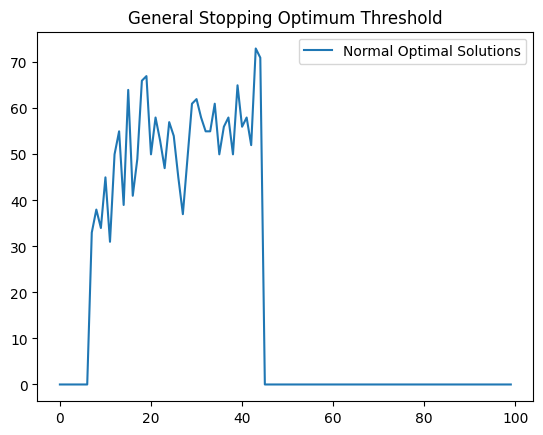

In [5]:
NUM_CANDIDATES = 100    # number of universities
NUM_EXPERIMENTS = 1000  # constant number of experiments to run

solution_found_count = [0 for _ in range(NUM_CANDIDATES)]
optimal_solution_found_count = [0 for _ in range(NUM_CANDIDATES)]

for _ in tqdm(range(NUM_EXPERIMENTS)):
    candidates = [(college, utils.heuristic_function(college, data)[0]) for college in utils.COLLEGES] # get sample of 100 universities and their heuristic value
    optimal_candidate = max(candidates, key=lambda x:x[1]) # optimal based on heuristic function
    
    for stopping_point in range(1, NUM_CANDIDATES):
        for univ, heuristic_value in candidates[stopping_point:-1]:
            if heuristic_value > max(candidates[0:stopping_point], key=lambda x:x[1])[1] and get_response(probability=utils.get_adm_rate(univ, data)):
                solution_found_count[stopping_point] += 1
                
                if univ == optimal_candidate[0]:
                    optimal_solution_found_count[stopping_point] += 1

                break

plt.plot(optimal_solution_found_count, label='Normal Optimal Solutions')
plt.title("General Stopping Optimum Threshold")
plt.legend()
plt.show()

threshold = find_peak(optimal_solution_found_count)[0] / NUM_CANDIDATES

In [6]:
threshold

0.43